### Question 1

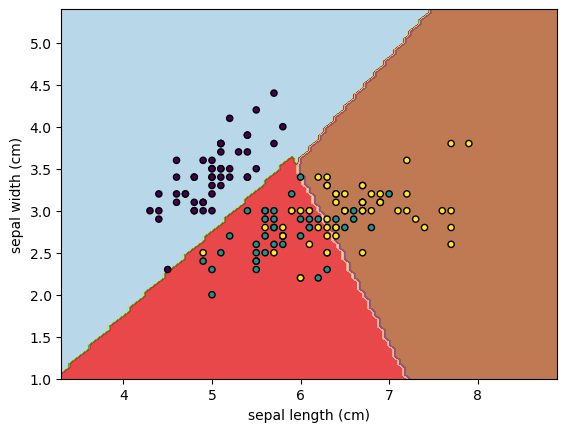

In [20]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Only using the first two features for 2D visualization
y = iris.target

# Build and train the SVM model with a linear kernel
svm = SVC(kernel='linear', C=1.0)
svm.fit(X, y)

# Plot the decision boundary
DecisionBoundaryDisplay.from_estimator(
    svm, X, response_method='predict', cmap=plt.cm.Paired, alpha=0.8,
    xlabel=iris.feature_names[0], ylabel=iris.feature_names[1]
)

# Scatter plot of the input features
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k')
plt.show()


### Question 2

Weights (w): [[ 6.6675e-01 -2.5000e-04]]
Bias (b): [-1.66691667]


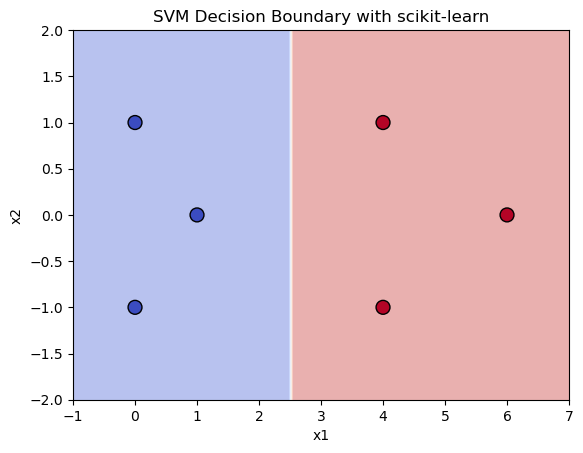

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Define the data points and labels
X = np.array([[4, 1], [4, -1], [6, 0], [1, 0], [0, 1], [0, -1]])
y = np.array([1, 1, 1, -1, -1, -1])

# Train an SVM with a linear kernel
svm = SVC(kernel='linear', C=1.0)
svm.fit(X, y)

# Display weights and bias
print("Weights (w):", svm.coef_)
print("Bias (b):", svm.intercept_)

# Plot the decision boundary and margin
def plot_decision_boundary(svm, X, y):
    # Generate a grid of points
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predict for the grid points
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)

    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', s=100)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('SVM Decision Boundary with scikit-learn')
    plt.show()

# Plot the decision boundary
plot_decision_boundary(svm, X, y)

### Question 3

Weight vector: [9 0]
Bias: -26.666666666666668


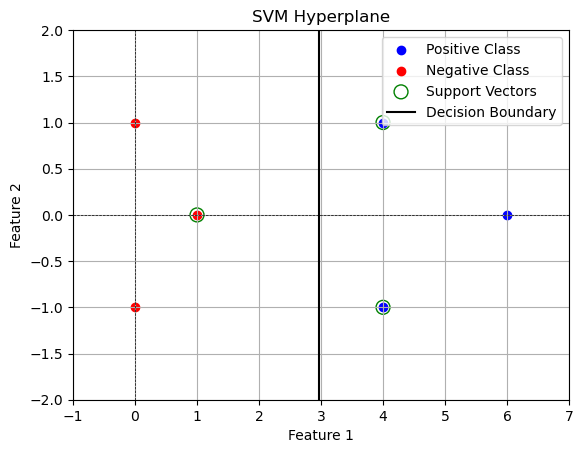

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the data points and labels
X = np.array([[4, 1], [4, -1], [6, 0], [1, 0], [0, 1], [0, -1]])
y = np.array([1, 1, 1, -1, -1, -1])

# Manually selecting three support vectors for demonstration
support_vector_indices = [3, 0, 1]  # Example indices for support vectors

# Calculate the weight vector based on chosen support vectors
w = np.sum( X[support_vector_indices], axis=0)

# Compute the bias term using all support vectors
b = np.mean(y[support_vector_indices] - np.dot(X[support_vector_indices], w))

# Print the weight vector and bias
print("Weight vector:", w)
print("Bias:", b)

# Step 6: Draw the hyperplane
def plot_hyperplane(X, y, w, b):
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Positive Class')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Negative Class')
    
    # Highlight support vectors
    plt.scatter(X[support_vector_indices][:, 0], X[support_vector_indices][:, 1], 
                facecolors='none', edgecolors='green', s=100, label='Support Vectors')

    # Create the hyperplane
    x_line = np.linspace(-1, 7, 10)

    # Check if w[1] is zero to avoid division by zero
    if w[1] != 0:
        y_line = -(w[0] * x_line + b) / w[1]
        plt.plot(x_line, y_line, color='black', label='Decision Boundary')
    else:
        # Vertical line case
        x_vertical = -b / w[0]
        plt.axvline(x=x_vertical, color='k', label='Decision Boundary')

    plt.xlim(-1, 7)
    plt.ylim(-2, 2)
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.axvline(0, color='black', lw=0.5, ls='--')
    plt.title('SVM Hyperplane')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid()
    plt.show()

plot_hyperplane(X, y, w, b)


### Question 4

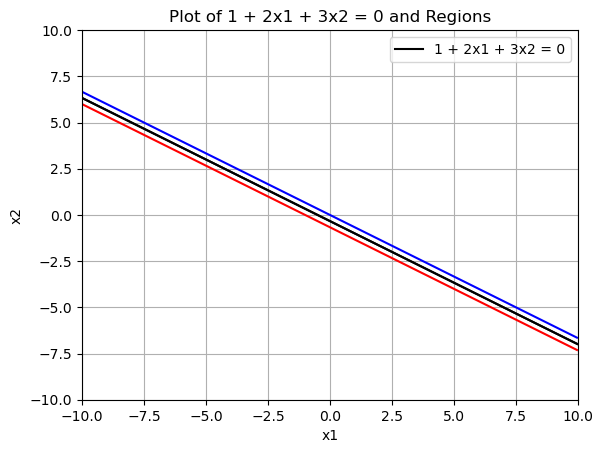

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Generate points in the range [-10, 10] for x1 and x2
x1 = np.linspace(-10, 10, 100)
x2 = -(1 + 2 * x1) / 3  # Hyperplane equation solved for x2

# Plot the hyperplane
plt.plot(x1, x2, label='1 + 2x1 + 3x2 = 0', color='black')

# Plotting regions where the expression is positive or negative
X1, X2 = np.meshgrid(np.arange(-10, 11, 1), np.arange(-10, 11, 1))
Z = 1 + 2 * X1 + 3 * X2

# Contour plot for positive, negative, and zero regions
plt.contour(X1, X2, Z, levels=[-1, 0, 1], colors=['red', 'black', 'blue'])

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Plot of 1 + 2x1 + 3x2 = 0 and Regions')
plt.legend()
plt.grid(True)
plt.show()


### Question 5

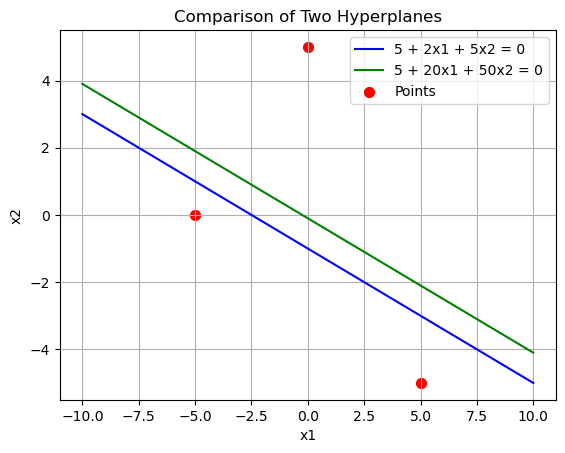

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x1 points for plotting
x1 = np.linspace(-10, 10, 100)

# Compute corresponding x2 values for both hyperplanes
x2_1 = -(5 + 2 * x1) / 5
x2_2 = -(5 + 20 * x1) / 50

# Plot both hyperplanes
plt.plot(x1, x2_1, label='5 + 2x1 + 5x2 = 0', color='blue')
plt.plot(x1, x2_2, label='5 + 20x1 + 50x2 = 0', color='green')

# Scatter plot the points for visual comparison
plt.scatter([-5, 0, 5], [0, 5, -5], color='red', s=50, label='Points')

# Label and display the plot
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Comparison of Two Hyperplanes')
plt.grid(True)
plt.show()


### Additional Question 1

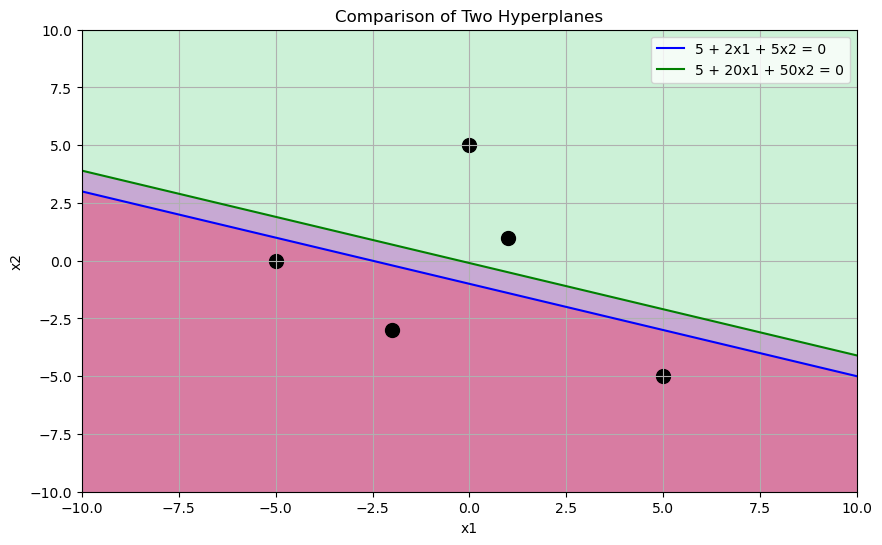

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def plot_hyperplane(w0, w1, w2, label, color):
    """Plots the hyperplane w0 + w1*x1 + w2*x2 = 0."""
    x1 = np.linspace(-10, 10, 100)
    x2 = -(w0 + w1 * x1) / w2
    plt.plot(x1, x2, label=label, color=color)

# Generate the hyperplanes
plt.figure(figsize=(10, 6))
plot_hyperplane(5, 2, 5, '5 + 2x1 + 5x2 = 0', 'blue')
plot_hyperplane(5, 20, 50, '5 + 20x1 + 50x2 = 0', 'green')

# Plot regions for both hyperplanes
x1, x2 = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))
Z1 = 5 + 2 * x1 + 5 * x2
Z2 = 5 + 20 * x1 + 50 * x2

plt.contourf(x1, x2, Z1, levels=[-np.inf, 0, np.inf], colors=['red', 'lightblue'], alpha=0.3)
plt.contourf(x1, x2, Z2, levels=[-np.inf, 0, np.inf], colors=['purple', 'lightgreen'], alpha=0.3)

# Scatter plot of some sample points for visual comparison
points = np.array([[-5, 0], [0, 5], [5, -5], [1, 1], [-2, -3]])
plt.scatter(points[:, 0], points[:, 1], color='black', s=100, marker='o')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Comparison of Two Hyperplanes')
plt.grid(True)
plt.show()


### Additional Question 2

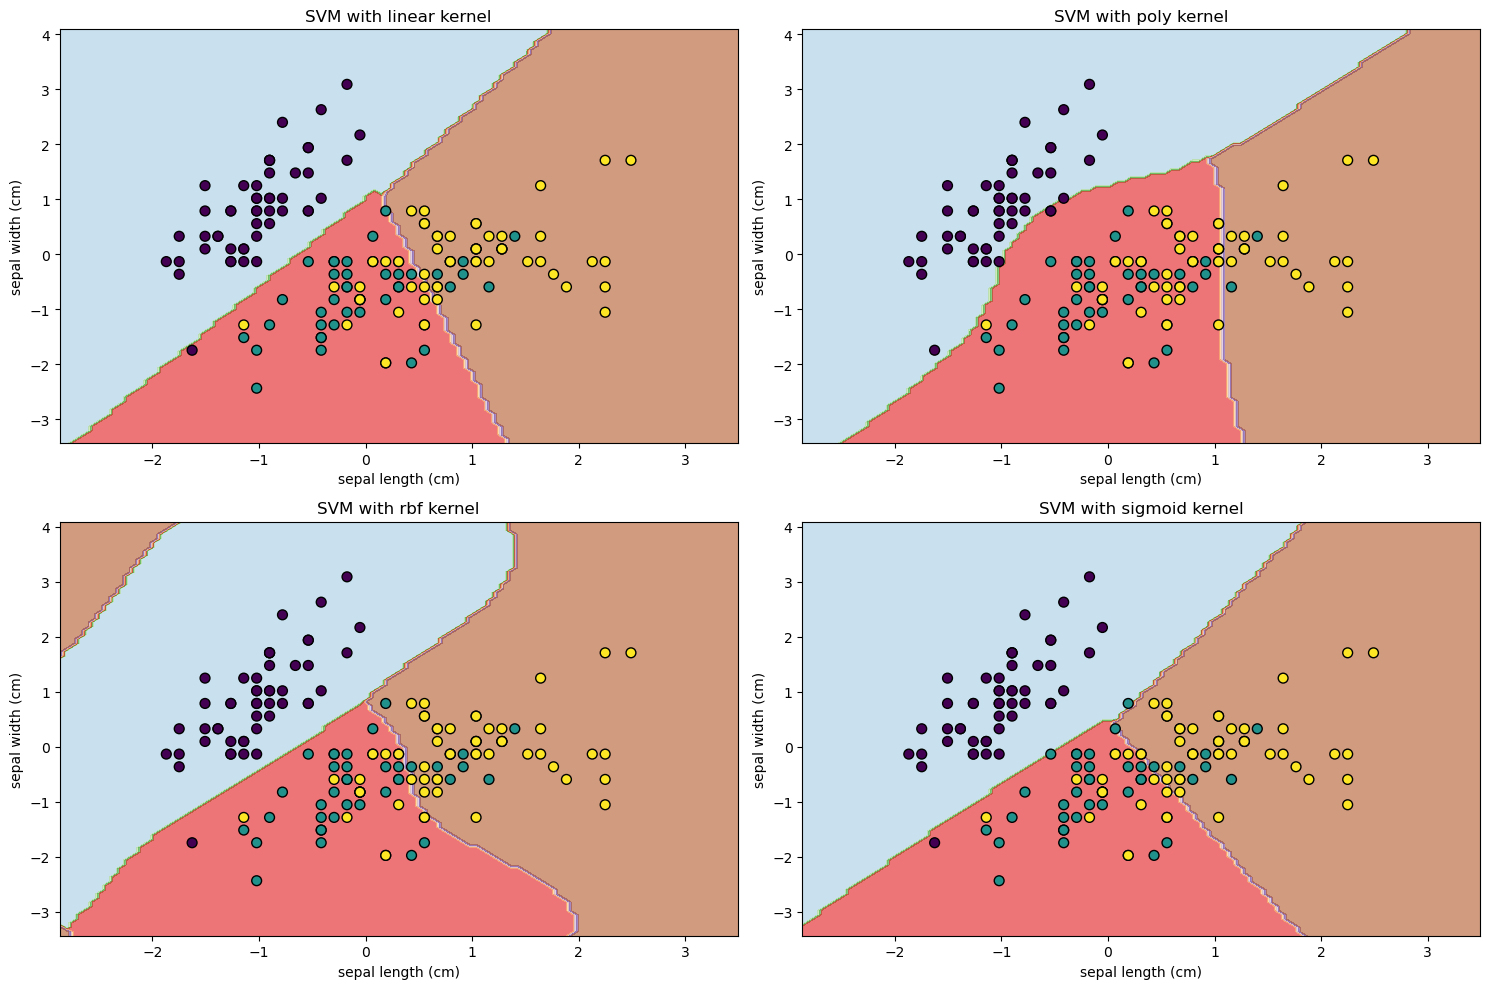

In [26]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features for visualization
y = iris.target

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define kernels to test
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Create subplots to visualize all four kernels
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, kernel in enumerate(kernels):
    # Train SVM with the selected kernel
    if kernel == 'sigmoid':
        svm = SVC(kernel=kernel, C=1.0, gamma=0.1, coef0=1.0)  # Adjust parameters for sigmoid kernel
    else:
        svm = SVC(kernel=kernel, C=1.0, gamma='auto')
        
    svm.fit(X_scaled, y)

    # Plot decision boundary
    DecisionBoundaryDisplay.from_estimator(
        svm, X_scaled, response_method='predict', cmap=plt.cm.Paired, alpha=0.6, ax=axes[i]
    )

    # Scatter plot of input features
    axes[i].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='k', s=50)
    axes[i].set_title(f'SVM with {kernel} kernel')
    axes[i].set_xlabel(iris.feature_names[0])
    axes[i].set_ylabel(iris.feature_names[1])

plt.tight_layout()
plt.show()
